In [4]:
using CSV
using DataFrames
using Optim
using Distributions
using LinearAlgebra   
using Plots
using SymPy

In [5]:
# Load Data 
particle_data = CSV.read("particles.csv", DataFrame)

Row,shower,pdg,kinetic_energy,x,y,z,time,weight
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,0,22,2.68063,-2511.15,5536.2,0.0,1.13973e-5,1.0
2,0,22,1.16594,-1897.83,3594.58,0.0,1.55407e-5,1.0
3,0,22,1.69784,-1689.12,3238.18,0.0,1.28297e-5,1.0
4,0,22,8.22074,-1520.27,2680.62,0.0,1.60523e-5,1.0
5,0,22,1.2727,-1450.41,2461.66,0.0,1.68368e-5,1.0
6,0,22,1.35689,-2470.07,5260.24,0.0,5.77628e-6,1.0
7,0,22,1.16295,-2714.79,5966.96,0.0,7.03563e-6,1.0
8,0,22,1.04626,-2740.38,6047.79,0.0,7.90808e-6,1.0
9,0,22,6.21258,-1973.2,4061.56,0.0,1.15843e-5,1.0


In [3]:
#= # Function to calculate the Cartesian distance between two points in 3D space
function cartesian_distance(x1, y1, z1, x2, y2, z2)
    return sqrt((x2 - x1)^2 + (y2 - y1)^2 + (z2 - z1)^2)
end

x1, y1, z1 = 5.82690291372798, 2.651239329640523, -0.7696777502523529 # Coordinates of the first point
x2, y2, z2 = -1.9042410053751477, -0.7535013903260498, 0.7194652218340803  # Coordinates of the second point

# Calculate the distance
distance = cartesian_distance(x1, y1, z1, core_position.x/1000,core_position.y/1000,core_position.z/1000)
println("The distance between the points is: $distance")

# Calculate t0
c = 299792 # km/s
t0 = distance/c
println("The value for t0 is: $t0") =#

In [6]:
normal_vector = [0.45217398524533681 -0.3661629880519191 0.81330397346148509]
x_axis = [0.0 -0.91184756344828699 -0.41052895273466672]
y_axis = [0.89192975455881607 0.18563051261662877 -0.41231374670066206]

rotation_matrix = vcat(x_axis, y_axis, normal_vector)

coords = hcat(particle_data.x, particle_data.y, particle_data.z)

rotated_positions = inv(rotation_matrix) * transpose(coords)

function calculate_mean_position(df)
    mean_x = mean(df[1,:])
    mean_y = mean(df[2,:])
    mean_z = mean(df[3,:])
    return (x=mean_x, y=mean_y, z=mean_z)
end

core_position = calculate_mean_position(rotated_positions)
println("Calculated core position: $(core_position)")

Calculated core position: (x = 2485.30829674464, y = 1867.8751468942435, z = -540.8125699123239)


In [5]:
new_z = (-normal_vector[1]*rotated_positions[1,:]-normal_vector[2]*rotated_positions[2,:])/normal_vector[3]

2171-element Vector{Float64}:
 -1251.7517847346417
  -702.9784074801104
  -641.7146527540976
  -481.14035349487875
  -419.53926941634035
 -1154.8317054911845
 -1345.761551885004
 -1368.5805492201946
  -864.5820318934467
  -844.4866459675404
 -1120.9150664692336
  -764.6459401552243
 -1097.621582562589
     ⋮
  -823.2909871386399
  -345.79119651064593
  -868.1369929103747
  -825.9530252542927
  -911.7377190569741
  -909.4108375132184
  -742.3105380616302
  -889.5489367117477
  -837.6869710578463
  -920.8803900706249
 -1047.3012092427332
  -866.0201235698407

4.6644148654757155e-6
0.001896009896510855
2.4859783399410016e-5


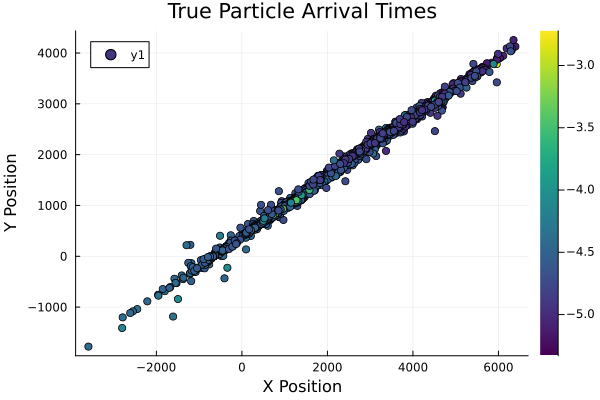

In [9]:
min_time = minimum(particle_data.time)
max_time = maximum(particle_data.time)
average_time = mean(particle_data.time)
normalized_time = (particle_data.time .- min_time) ./ (max_time - min_time)

println(min_time)
println(max_time)
println(average_time)

#scatter(rotated_positions[1, :], rotated_positions[2, :], marker_z=particle_data.time, color=:viridis, clims=(4.6644148654757155e-6, 0.001896009896510855), xlabel="X Position", ylabel="Y Position", title="True Particle Arrival Times")
scatter(rotated_positions[1, :], rotated_positions[2, :], marker_z=log10.(particle_data.time), color=:viridis, xlabel="X Position", ylabel="Y Position", title="True Particle Arrival Times")

#= scatter!((-1904,-753))
scatter!((2485.30829674464,1867.8751468942435)) =#

# savefig("true_particle_arrival_times.png")

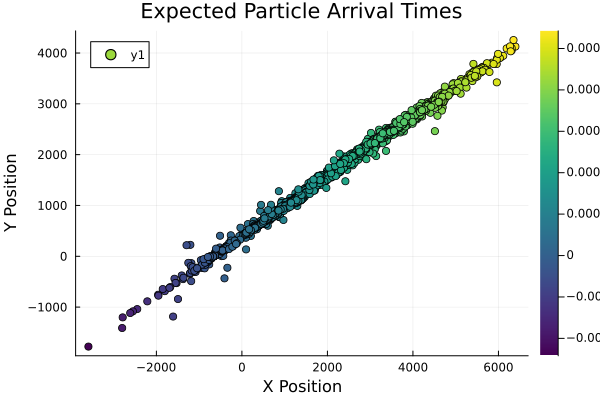

In [61]:
scatter(rotated_positions[1, :], rotated_positions[2, :], marker_z=expected_time, color=:viridis, xlabel="X Position", ylabel="Y Position", title="Expected Particle Arrival Times")

In [52]:
a = 4.823e-4 / 1e9  # in s/m^2
b = 19.41 / 1e9     # in seconds (s)
sigma = 83.5  # in meters (m)
c = 299792458  # Speed of light in meters per second (m/s)
#t0 = 2.8612842910494837e-5  # Initial time in seconds using intecept 
t0 = 1.1473988855994108e-5 # Initial time in seconds using mean position of particles 

function delta_t(a,b,sigma,R)
    return a * R^2 + b * (1 - exp(-R^2 / (2 * sigma^2)))
end

initial_position = (x=5826.90291372798, y=2651.239329640523, z=-769.6777502523529)
pos = (x=-1904.2410053751477, y=-753.5013903260498, z=719.4652218340803)
core= (x=2485.30829674464, y=1867.8751468942435, z=-540.8125699123239)

zenith_rad = deg2rad(-99.99732787664736)
azimuth_rad = deg2rad(203.76835088101396)
direction_vector = (
    xdir = sin(zenith_rad) * cos(azimuth_rad),
    ydir = sin(zenith_rad) * sin(azimuth_rad),
    zdir = cos(zenith_rad)
)

function expected_signal_time(t0, pos, core, a, b, sigma, direction_vector)
    c = 299792458
    R = solved_R(pos, core, direction_vector) 
    delta_t_val = delta_t(a,b,sigma,R)
    dot_product = dot((pos .-values(core)),direction_vector)
    return t0 + (dot_product / c) + delta_t_val
end

expected_time = []

# println(length(rotated_positions)/3)

for i in 1:1:Int64(length(rotated_positions)/3)
    push!(expected_time, expected_signal_time(t0,rotated_positions[:,i],core_position,a,b,sigma,direction_vector))
end




In [37]:
#data time
minimum(expected_time) 

# Count and print all negative values in expected_time
negatives = 0

for time in expected_time
    if time < 0
        println(time)
        negatives += 1
    end
end

println("# of negatives: $negatives")

-4.2980982100463256e-6
-2.7373219858575248e-6
-4.202412039201624e-6
-8.988115496980973e-6
-1.5156621453007232e-7
-5.257293797168878e-6
-5.386207917211023e-6
-1.7634683517934105e-6
-1.963812663695075e-6
-4.277310761928102e-6
-3.0033226700887733e-6
-4.163682262030594e-7
-1.5803553415745414e-6
-2.644957618265128e-6
-5.8366714145211305e-6
-2.0143289933589386e-7
-2.9646324956356036e-6
-7.713142469559456e-6
-5.830324502310038e-6
-2.5169150798890705e-6
-5.99156926933298e-8
-9.154227212007998e-6
-4.2532293815859435e-6
-2.702423227719306e-6
-1.2755241440380244e-7
-2.3699926226356947e-6
-1.538772321802085e-7
-2.0267393593660005e-7
-2.9339439234247296e-6
-3.3512599025602367e-7
-2.803357640379686e-6
-6.62921126028074e-7
-1.7338316949604928e-6
-2.511638866049465e-6
-1.309752099086111e-7
-2.9909283317060617e-6
-1.8948317619070585e-7
-2.8026947227672683e-6
-2.656477390762776e-6
-1.3124577462140289e-6
-5.821350011520732e-7
-2.410244960405239e-7
-1.4277474430435343e-6
-1.7903424013130854e-6
-1.21058167

In [7]:
#= pos = rotated_positions.x

core = core_posistion =#

function solved_R(pos, core, direction_vector)
       
        if all(pos .== values(core))
                return 0 
        end 
        
        norm((pos .- values(core))sin(acos(dot(normalize((pos .- values(core))), direction_vector))))
end

println(rotated_positions[:,1])

R = solved_R(rotated_positions[:,1], core, direction_vector)
println(norm(R))
println("R = $R")

[4937.898831399255, 3317.4699045433363, -1251.7517847346414]
397.55654281484465
R = 397.55654281484465


In [ ]:
#= function std_dev_function(R)
    return 2.92 + 3.77e-4 * R^2  # σt(Ri) in ns
end

function likelihood_timing(particle_data, params)
    t0, xc, yc, zc, n1, n2, n3, c, a0, a1, a2 = params
    xc_vector = [xc, yc, zc]
    n_vector = [n1, n2, n3]
    log_likelihood = 0.0
    for row in eachrow(particle_data)
        x_pos = [row.x, row.y, row.z]  
        R = norm(x_pos .- xc_vector)
        sigma_t = std_dev_function(R)
        t_expected = expected_signal_time(x_pos, t0, xc_vector, n_vector, c, a0, a1, a2)
        log_likelihood += logpdf(Normal(t_expected, sigma_t), row.observed_time)
    end
    return -log_likelihood  
end =#

In [ ]:
#= particle_data = DataFrame(x = [1.0, 2.0, 3.0], y = [1.0, 2.0, 3.0], z = [1.0, 2.0, 3.0], observed_time = [10.0, 20.0, 30.0])

params = [t_0, 5.0, 5.0, 5.0, direction_vector.xdir, direction_vector.ydir, direction_vector.zdir, c, 4.823e-4, 19.41, 83.5]

log_likelihood = likelihood_timing(particle_data, params)
println("Log-likelihood: $log_likelihood") =#

In [ ]:
#= function gradient_likelihood(particle_data, params)
    gradients = zeros(length(params))
    epsilon = 1e-5
    for i in 1:length(params)
        params_eps = copy(params)
        params_eps[i] += epsilon
        grad = (likelihood_timing(particle_data, params_eps) - likelihood_timing(particle_data, params)) / epsilon
        gradients[i] = grad
    end
    return gradients
end =#

In [ ]:
#= num_epochs = 20
errors = Float64[] 

learning_rate = 0.01

for epoch in 1:num_epochs

    current_error = likelihood_timing(particle_data, params)
    
    push!(errors, current_error)
    
    println("Epoch $epoch, Error: $current_error")
    
    gradients = gradient_likelihood(particle_data, params)
    
    for i in 1:length(params)
        params[i] -= learning_rate * gradients[i]
    end
end

training_data = DataFrame(epoch = 1:num_epochs, error = errors)
 =#

In [ ]:
#= # Plot
plot(training_data.epoch, training_data.error, marker = :circle, linestyle = :solid, color = :blue, xlabel = "Epoch", ylabel = "Error", title = "Error vs. Epochs", grid = true)
 =#